# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Откройте файл с данными и изучите общую информацию. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
pd.set_option('chained_assignment', None)

In [3]:
data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')

In [4]:
data

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000.0,133.81,2017-03-21T00:00:00,3,3.70,5.0,73.3,3,NaN,...,13.83,NaN,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN
23695,14,3100000.0,59.00,2018-01-15T00:00:00,3,NaN,5.0,38.0,4,NaN,...,8.50,NaN,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23696,18,2500000.0,56.70,2018-02-11T00:00:00,2,NaN,3.0,29.7,1,NaN,...,NaN,NaN,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23697,13,11475000.0,76.75,2017-03-28T00:00:00,2,3.00,17.0,NaN,12,NaN,...,23.30,2.0,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

array([[<AxesSubplot:title={'center':'total_images'}>,
        <AxesSubplot:title={'center':'last_price'}>,
        <AxesSubplot:title={'center':'total_area'}>,
        <AxesSubplot:title={'center':'rooms'}>],
       [<AxesSubplot:title={'center':'ceiling_height'}>,
        <AxesSubplot:title={'center':'floors_total'}>,
        <AxesSubplot:title={'center':'living_area'}>,
        <AxesSubplot:title={'center':'floor'}>],
       [<AxesSubplot:title={'center':'kitchen_area'}>,
        <AxesSubplot:title={'center':'balcony'}>,
        <AxesSubplot:title={'center':'airports_nearest'}>,
        <AxesSubplot:title={'center':'cityCenters_nearest'}>],
       [<AxesSubplot:title={'center':'parks_around3000'}>,
        <AxesSubplot:title={'center':'parks_nearest'}>,
        <AxesSubplot:title={'center':'ponds_around3000'}>,
        <AxesSubplot:title={'center':'ponds_nearest'}>],
       [<AxesSubplot:title={'center':'days_exposition'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], d

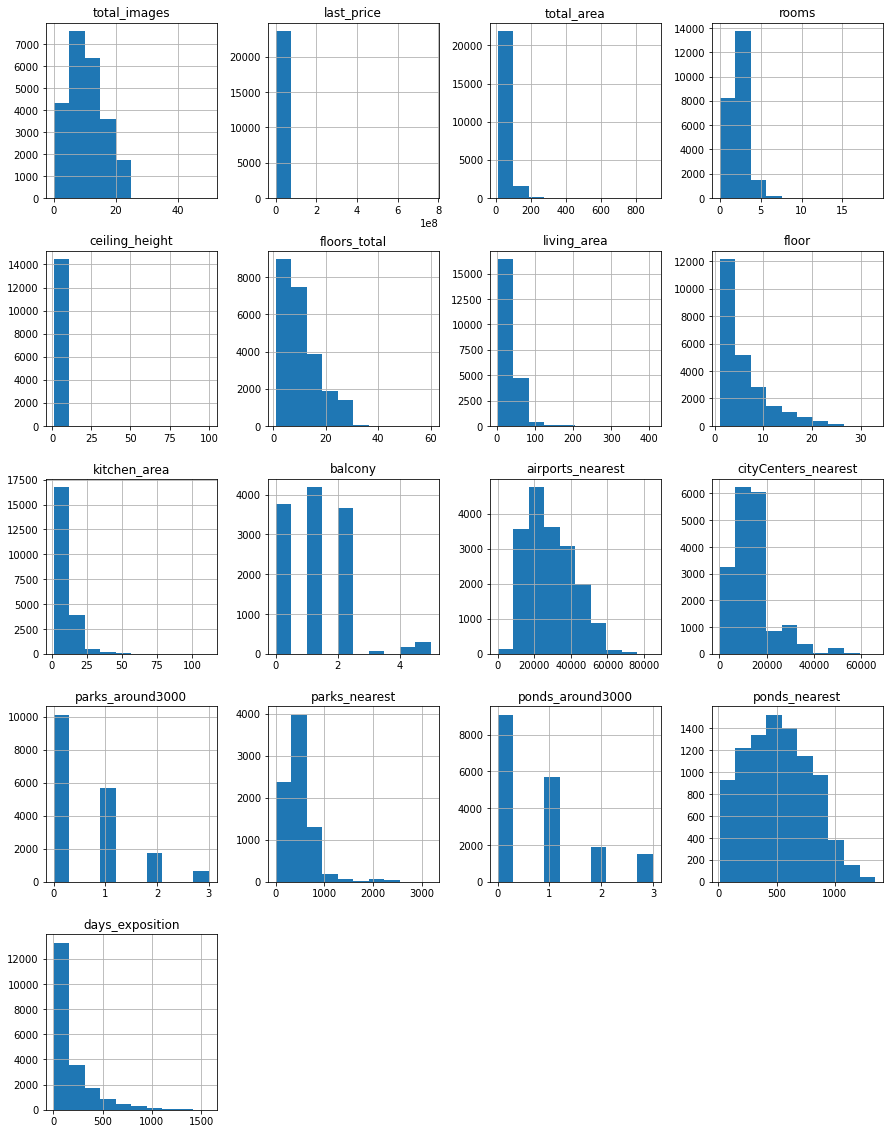

In [6]:
data.hist(figsize=(15, 20))

### Предобработка данных

**Определим наличие дубликатов:**

In [7]:
data.duplicated().sum()

0

**Определим в каких столбцах есть пропуски:**

In [8]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

**Предположим, что балконы в квартирах, где не указано их количество, отсутствуют. Заменим пропуски в столбце "balcony" на "0".**

In [9]:
data['balcony'] = data['balcony'].fillna(0)
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                     0
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

**Предположим, что в все пропуски в столбце is_apartment означают, что квартира не является аппартаментами. Заполним все пропуски в данном столбце значением False:**

In [10]:
data['is_apartment'] = data['is_apartment'].fillna(False)
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area             2278
balcony                     0
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

**Проверим максимальные значения в столбцах airports_nearest и cityCenters_nearest:**

In [11]:
data['airports_nearest'].max()

84869.0

In [12]:
data['cityCenters_nearest'].max()

65968.0

**Подтвердим, что отсуствие данных по столбцам ponds_around3000 и parks_around3000 связано только с отсутствием прудов и парков поблизости:**

In [13]:
data.query("ponds_nearest.isna() and ponds_around3000>0")

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition


In [14]:
data.query("parks_nearest.isna() and parks_around3000>0")

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition



    
**Кроме того, имеем 86 пропусков в колонке floors_total и 49 пропусков в колонке locality_name. Так как пропусков немного относительно количесва всех строк в таблице удалим строки, где есть пропуски в этих колонках:**

In [15]:
data = data.dropna(subset=['floors_total','locality_name'])

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23565 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23565 non-null  int64  
 1   last_price            23565 non-null  float64
 2   total_area            23565 non-null  float64
 3   first_day_exposition  23565 non-null  object 
 4   rooms                 23565 non-null  int64  
 5   ceiling_height        14481 non-null  float64
 6   floors_total          23565 non-null  float64
 7   living_area           21700 non-null  float64
 8   floor                 23565 non-null  int64  
 9   is_apartment          23565 non-null  bool   
 10  studio                23565 non-null  bool   
 11  open_plan             23565 non-null  bool   
 12  kitchen_area          21343 non-null  float64
 13  balcony               23565 non-null  float64
 14  locality_name         23565 non-null  object 
 15  airports_nearest   


После удаления строк с пропусками в данных столбцах осталось 23565 строк, что составляет 99.5% от первоначального количества строк.

**Причины пропусков в данных:**

Пропуски в колонках, добавленных пользователем (ceiling_height, floors_total, living_area, is_apartment, kitchen_area, locality_name, floors_total, locality_name), могут быть связаны с тем, что в пользователи не указали эти данные в объявлении (по незнанию этих параметров или по нежеланию эти параметры заполнять).

Пропуски в колонках, с картографическим типом данных (airports_nearest, cityCenters_nearest, parks_around3000, parks_nearest, ponds_around3000, ponds_nearest) связяны с отсутсвием соответствующей инфраструктуры поблизости.

Пропуски в колонке days_exposition скорее всего связаны с тем, что данные объявления остались на сайте как актуальные. Это могло произойти по следующим причинам: объявление недавно размещено, владелец объявления забыл убрать объявление с сайта.

**Изменим тип данных в столбце first_day_exposition для возможности производить вычисления с данным столбцом:**

In [17]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23565 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23565 non-null  int64         
 1   last_price            23565 non-null  float64       
 2   total_area            23565 non-null  float64       
 3   first_day_exposition  23565 non-null  datetime64[ns]
 4   rooms                 23565 non-null  int64         
 5   ceiling_height        14481 non-null  float64       
 6   floors_total          23565 non-null  float64       
 7   living_area           21700 non-null  float64       
 8   floor                 23565 non-null  int64         
 9   is_apartment          23565 non-null  bool          
 10  studio                23565 non-null  bool          
 11  open_plan             23565 non-null  bool          
 12  kitchen_area          21343 non-null  float64       
 13  balcony         

**Найдем и устраним неявные дубликаты:**

In [18]:
data['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

In [19]:
data['locality_name'].nunique()

364

In [20]:
data['locality_name'] = data['locality_name'].str.replace('ё', 'е')
to_replace = [
    'поселок городского типа ', 'поселок ', 'деревня ', 'городской ', 'садовое товарищество ', 
    'садоводческое некоммерческое товарищество ', 'коттеджный ', 'при железнодорожной станции '
]
for substr in to_replace:
  data['locality_name'] = data['locality_name'].str.replace(substr, '')

In [21]:
data['locality_name'].nunique()

310

**Из 364 названий населенных пунктов осталось 310.**

**Обработаем редкие и выбивающиеся значения:** 

In [22]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23565.000000,2.356500e+04,23565.000000,23565.000000,14481.000000,23565.000000,21700.000000,23565.000000,21343.000000,23565.000000,18041.000000,18064.000000,18065.000000,8030.000000,18065.000000,9036.000000,20394.000000
mean,9.878421,6.540058e+06,60.322824,2.070656,2.771283,10.675875,34.454822,5.878124,10.560994,0.593677,28797.082701,14192.656056,0.611569,490.580448,0.769499,518.289509,180.741395
std,5.681156,1.091093e+07,35.657060,1.078591,1.261983,6.594823,22.045359,4.871485,5.900630,0.960660,12632.499735,8613.348153,0.802088,341.572956,0.938669,278.009558,219.732782
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.510000,5.000000,18.600000,2.000000,7.000000,0.000000,18565.000000,9238.000000,0.000000,288.000000,0.000000,293.000000,45.000000
50%,9.000000,4.646000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,0.000000,26757.000000,13096.500000,0.000000,455.000000,1.000000,503.000000,95.000000
75%,14.000000,6.790000e+06,69.700000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,1.000000,37273.000000,16285.000000,1.000000,612.000000,1.000000,730.000000,231.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


**Изучим уникальные значения в столбце ceiling_height:**

In [23]:
data['ceiling_height'].unique()

array([  2.7 ,    nan,   3.03,   2.5 ,   2.67,   2.56,   3.05,   2.75,
         2.6 ,   2.9 ,   2.8 ,   2.55,   3.  ,   2.65,   3.2 ,   2.61,
         3.25,   3.45,   2.77,   2.85,   2.64,   2.57,   4.15,   3.5 ,
         3.3 ,   2.71,   4.  ,   2.47,   2.73,   2.84,   3.1 ,   2.34,
         3.4 ,   3.06,   2.72,   2.54,   2.51,   2.78,   2.76,  25.  ,
         2.58,   3.7 ,   2.52,   5.2 ,   2.87,   2.66,   2.59,   2.  ,
         2.45,   3.6 ,   2.92,   3.11,   3.13,   3.8 ,   3.15,   3.55,
         3.16,   3.62,   3.12,   2.53,   2.74,   2.96,   2.46,   5.3 ,
         5.  ,   2.79,   2.95,   4.06,   2.94,   3.82,   3.54,   3.53,
         2.83,   4.7 ,   2.4 ,   3.38,   3.01,   5.6 ,   3.65,   3.9 ,
         3.18,   3.35,   2.3 ,   3.57,   2.48,   2.62,   2.82,   3.98,
         2.63,   3.83,   3.52,   3.95,   3.75,   2.88,   3.67,   3.87,
         3.66,   3.85,   3.86,   4.19,   3.24,   4.8 ,   4.5 ,   4.2 ,
         3.36,  32.  ,   3.08,   3.68,   3.07,   3.37,   3.09,   8.  ,
      

**В столбце ceiling_height есть выбивающиеся значения. Предположим, что высота потолков больше 20 - это ошибка при вводе данных. Разделим значения больше 20 на 10. Кроме того, уберем значения меньше 2. Так как высота потолков менее 2 явные ошибки.**

In [24]:
data.loc[data['ceiling_height']>20, 'ceiling_height'] = data.loc[data['ceiling_height']>20, 'ceiling_height']/10
data['ceiling_height'].unique()

array([ 2.7 ,   nan,  3.03,  2.5 ,  2.67,  2.56,  3.05,  2.75,  2.6 ,
        2.9 ,  2.8 ,  2.55,  3.  ,  2.65,  3.2 ,  2.61,  3.25,  3.45,
        2.77,  2.85,  2.64,  2.57,  4.15,  3.5 ,  3.3 ,  2.71,  4.  ,
        2.47,  2.73,  2.84,  3.1 ,  2.34,  3.4 ,  3.06,  2.72,  2.54,
        2.51,  2.78,  2.76,  2.58,  3.7 ,  2.52,  5.2 ,  2.87,  2.66,
        2.59,  2.  ,  2.45,  3.6 ,  2.92,  3.11,  3.13,  3.8 ,  3.15,
        3.55,  3.16,  3.62,  3.12,  2.53,  2.74,  2.96,  2.46,  5.3 ,
        5.  ,  2.79,  2.95,  4.06,  2.94,  3.82,  3.54,  3.53,  2.83,
        4.7 ,  2.4 ,  3.38,  3.01,  5.6 ,  3.65,  3.9 ,  3.18,  3.35,
        2.3 ,  3.57,  2.48,  2.62,  2.82,  3.98,  2.63,  3.83,  3.52,
        3.95,  3.75,  2.88,  3.67,  3.87,  3.66,  3.85,  3.86,  4.19,
        3.24,  4.8 ,  4.5 ,  4.2 ,  3.36,  3.08,  3.68,  3.07,  3.37,
        3.09,  8.  ,  3.26,  3.34,  2.81,  3.44,  2.97,  3.14,  4.37,
        2.68,  3.22,  3.27,  4.1 ,  2.93,  3.46,  3.47,  3.33,  3.63,
        3.32,  1.2 ,

In [25]:
data = data.loc[data['ceiling_height']>2]
data['ceiling_height'].unique()

array([ 2.7 ,  3.03,  2.5 ,  2.67,  2.56,  3.05,  2.75,  2.6 ,  2.9 ,
        2.8 ,  2.55,  3.  ,  2.65,  3.2 ,  2.61,  3.25,  3.45,  2.77,
        2.85,  2.64,  2.57,  4.15,  3.5 ,  3.3 ,  2.71,  4.  ,  2.47,
        2.73,  2.84,  3.1 ,  2.34,  3.4 ,  3.06,  2.72,  2.54,  2.51,
        2.78,  2.76,  2.58,  3.7 ,  2.52,  5.2 ,  2.87,  2.66,  2.59,
        2.45,  3.6 ,  2.92,  3.11,  3.13,  3.8 ,  3.15,  3.55,  3.16,
        3.62,  3.12,  2.53,  2.74,  2.96,  2.46,  5.3 ,  5.  ,  2.79,
        2.95,  4.06,  2.94,  3.82,  3.54,  3.53,  2.83,  4.7 ,  2.4 ,
        3.38,  3.01,  5.6 ,  3.65,  3.9 ,  3.18,  3.35,  2.3 ,  3.57,
        2.48,  2.62,  2.82,  3.98,  2.63,  3.83,  3.52,  3.95,  3.75,
        2.88,  3.67,  3.87,  3.66,  3.85,  3.86,  4.19,  3.24,  4.8 ,
        4.5 ,  4.2 ,  3.36,  3.08,  3.68,  3.07,  3.37,  3.09,  8.  ,
        3.26,  3.34,  2.81,  3.44,  2.97,  3.14,  4.37,  2.68,  3.22,
        3.27,  4.1 ,  2.93,  3.46,  3.47,  3.33,  3.63,  3.32,  8.3 ,
        2.98,  2.86,

### Посчитайте и добавьте в таблицу новые столбцы

**Добавим в таблицу новый столбец - price_area. В котором найдем цену за квадратный метр (разделим значения в last_price на значения total_area):**

In [26]:
data['price_area'] = round(data['last_price']/data['total_area'])

**Добавим новый столбец - день недели публикации объявления (0 — понедельник, 1 — вторник и так далее):**

In [27]:
data['dayofweek_exposition'] = data['first_day_exposition'].dt.dayofweek
data

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_area,dayofweek_exposition
0,20,13000000.0,108.00,2019-03-07,3,2.70,16.0,51.0,8,False,...,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,120370.0,3
4,2,10000000.0,100.00,2018-06-19,2,3.03,14.0,32.0,13,False,...,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,100000.0,1
9,18,5400000.0,61.00,2017-02-26,3,2.50,9.0,43.6,7,False,...,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0,88525.0,6
10,5,5050000.0,39.60,2017-11-16,1,2.67,12.0,20.3,3,False,...,Санкт-Петербург,38357.0,13878.0,1.0,310.0,2.0,553.0,137.0,127525.0,3
13,20,3550000.0,42.80,2017-07-01,2,2.56,5.0,27.0,5,False,...,Петергоф,37868.0,33058.0,1.0,294.0,3.0,298.0,366.0,82944.0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23691,11,9470000.0,72.90,2016-10-13,2,2.75,25.0,40.3,7,False,...,Санкт-Петербург,19424.0,4489.0,0.0,NaN,1.0,806.0,519.0,129904.0,3
23693,9,4600000.0,62.40,2016-08-05,3,2.60,9.0,40.0,8,False,...,Петергоф,45602.0,34104.0,1.0,352.0,1.0,675.0,239.0,73718.0,4
23694,9,9700000.0,133.81,2017-03-21,3,3.70,5.0,73.3,3,False,...,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN,72491.0,1
23697,13,11475000.0,76.75,2017-03-28,2,3.00,17.0,NaN,12,False,...,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0,149511.0,1


**Добавим новый столбец - месяц публикации объявления:**

In [28]:
data['month_exposition'] = data['first_day_exposition'].dt.month
data

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_area,dayofweek_exposition,month_exposition
0,20,13000000.0,108.00,2019-03-07,3,2.70,16.0,51.0,8,False,...,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,120370.0,3,3
4,2,10000000.0,100.00,2018-06-19,2,3.03,14.0,32.0,13,False,...,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,100000.0,1,6
9,18,5400000.0,61.00,2017-02-26,3,2.50,9.0,43.6,7,False,...,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0,88525.0,6,2
10,5,5050000.0,39.60,2017-11-16,1,2.67,12.0,20.3,3,False,...,38357.0,13878.0,1.0,310.0,2.0,553.0,137.0,127525.0,3,11
13,20,3550000.0,42.80,2017-07-01,2,2.56,5.0,27.0,5,False,...,37868.0,33058.0,1.0,294.0,3.0,298.0,366.0,82944.0,5,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23691,11,9470000.0,72.90,2016-10-13,2,2.75,25.0,40.3,7,False,...,19424.0,4489.0,0.0,NaN,1.0,806.0,519.0,129904.0,3,10
23693,9,4600000.0,62.40,2016-08-05,3,2.60,9.0,40.0,8,False,...,45602.0,34104.0,1.0,352.0,1.0,675.0,239.0,73718.0,4,8
23694,9,9700000.0,133.81,2017-03-21,3,3.70,5.0,73.3,3,False,...,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN,72491.0,1,3
23697,13,11475000.0,76.75,2017-03-28,2,3.00,17.0,NaN,12,False,...,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0,149511.0,1,3


**Добавим новый столбец - год публикации объявления:**

In [29]:
data['year_exposition'] = data['first_day_exposition'].dt.year
data

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_area,dayofweek_exposition,month_exposition,year_exposition
0,20,13000000.0,108.00,2019-03-07,3,2.70,16.0,51.0,8,False,...,16028.0,1.0,482.0,2.0,755.0,NaN,120370.0,3,3,2019
4,2,10000000.0,100.00,2018-06-19,2,3.03,14.0,32.0,13,False,...,8098.0,2.0,112.0,1.0,48.0,121.0,100000.0,1,6,2018
9,18,5400000.0,61.00,2017-02-26,3,2.50,9.0,43.6,7,False,...,15008.0,0.0,NaN,0.0,NaN,289.0,88525.0,6,2,2017
10,5,5050000.0,39.60,2017-11-16,1,2.67,12.0,20.3,3,False,...,13878.0,1.0,310.0,2.0,553.0,137.0,127525.0,3,11,2017
13,20,3550000.0,42.80,2017-07-01,2,2.56,5.0,27.0,5,False,...,33058.0,1.0,294.0,3.0,298.0,366.0,82944.0,5,7,2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23691,11,9470000.0,72.90,2016-10-13,2,2.75,25.0,40.3,7,False,...,4489.0,0.0,NaN,1.0,806.0,519.0,129904.0,3,10,2016
23693,9,4600000.0,62.40,2016-08-05,3,2.60,9.0,40.0,8,False,...,34104.0,1.0,352.0,1.0,675.0,239.0,73718.0,4,8,2016
23694,9,9700000.0,133.81,2017-03-21,3,3.70,5.0,73.3,3,False,...,4232.0,1.0,796.0,3.0,381.0,NaN,72491.0,1,3,2017
23697,13,11475000.0,76.75,2017-03-28,2,3.00,17.0,NaN,12,False,...,10364.0,2.0,173.0,3.0,196.0,602.0,149511.0,1,3,2017


**Добавим новый столбец - тип этажа квартиры (значения — «‎первый», «последний», «другой»):**

In [30]:
def floor_group(row):
    if row['floor'] == 1:
        return 'первый'
    
    if row['floor'] == row['floors_total']:
        return 'последний'
    
    return 'другой'

data['floor_type'] = data.apply(floor_group, axis=1)
data

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_area,dayofweek_exposition,month_exposition,year_exposition,floor_type
0,20,13000000.0,108.00,2019-03-07,3,2.70,16.0,51.0,8,False,...,1.0,482.0,2.0,755.0,NaN,120370.0,3,3,2019,другой
4,2,10000000.0,100.00,2018-06-19,2,3.03,14.0,32.0,13,False,...,2.0,112.0,1.0,48.0,121.0,100000.0,1,6,2018,другой
9,18,5400000.0,61.00,2017-02-26,3,2.50,9.0,43.6,7,False,...,0.0,NaN,0.0,NaN,289.0,88525.0,6,2,2017,другой
10,5,5050000.0,39.60,2017-11-16,1,2.67,12.0,20.3,3,False,...,1.0,310.0,2.0,553.0,137.0,127525.0,3,11,2017,другой
13,20,3550000.0,42.80,2017-07-01,2,2.56,5.0,27.0,5,False,...,1.0,294.0,3.0,298.0,366.0,82944.0,5,7,2017,последний
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23691,11,9470000.0,72.90,2016-10-13,2,2.75,25.0,40.3,7,False,...,0.0,NaN,1.0,806.0,519.0,129904.0,3,10,2016,другой
23693,9,4600000.0,62.40,2016-08-05,3,2.60,9.0,40.0,8,False,...,1.0,352.0,1.0,675.0,239.0,73718.0,4,8,2016,другой
23694,9,9700000.0,133.81,2017-03-21,3,3.70,5.0,73.3,3,False,...,1.0,796.0,3.0,381.0,NaN,72491.0,1,3,2017,другой
23697,13,11475000.0,76.75,2017-03-28,2,3.00,17.0,NaN,12,False,...,2.0,173.0,3.0,196.0,602.0,149511.0,1,3,2017,другой


**Добавим новый столбец - расстояние до центра города в километрах:**

In [31]:
data['cityCenters_km'] = round(data['cityCenters_nearest']/1000)
data[['cityCenters_nearest', 'cityCenters_km']]

,cityCenters_nearest,cityCenters_km
0,16028.0,16.0
4,8098.0,8.0
9,15008.0,15.0
10,13878.0,14.0
13,33058.0,33.0
...,...,...
23691,4489.0,4.0
23693,34104.0,34.0
23694,4232.0,4.0
23697,10364.0,10.0


### Проведите исследовательский анализ данных

**Построим гистограмму для общей площади:**

[Text(0.5, 1.0, 'Гистограмма площадей квартир'),
 Text(0.5, 0, 'Общая площадь, м2'),
 Text(0, 0.5, 'Кол-во квартир')]

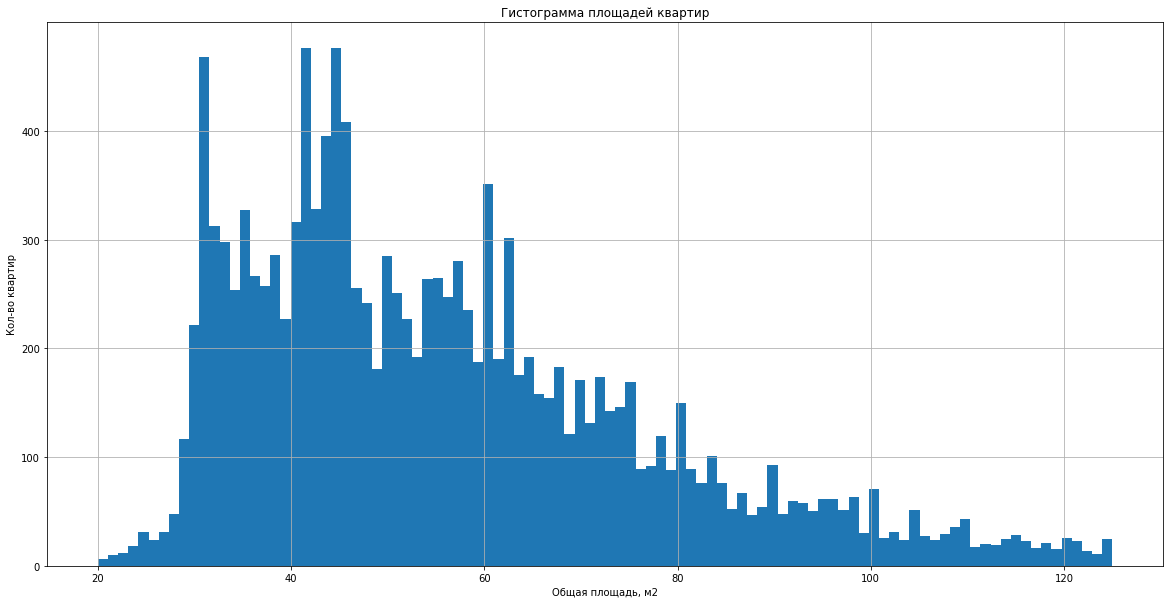

In [32]:
data['total_area'].hist(bins=100, range=(20, 125), figsize=(20,10))\
    .set(title = 'Гистограмма площадей квартир', xlabel = 'Общая площадь, м2', ylabel = 'Кол-во квартир')

В основном квартиры сдаются площадью от 25 до 120 кв. метров. Имеются пики, которые предположительно соответствуют типовым площадям для одно-, двух-, трех- комнатных квартир.

**Построим гистограмму для жилой площади:**

[Text(0.5, 1.0, 'Гистограмма жилых площадей'),
 Text(0.5, 0, 'Жилая площадь, м2'),
 Text(0, 0.5, 'Кол-во квартир')]

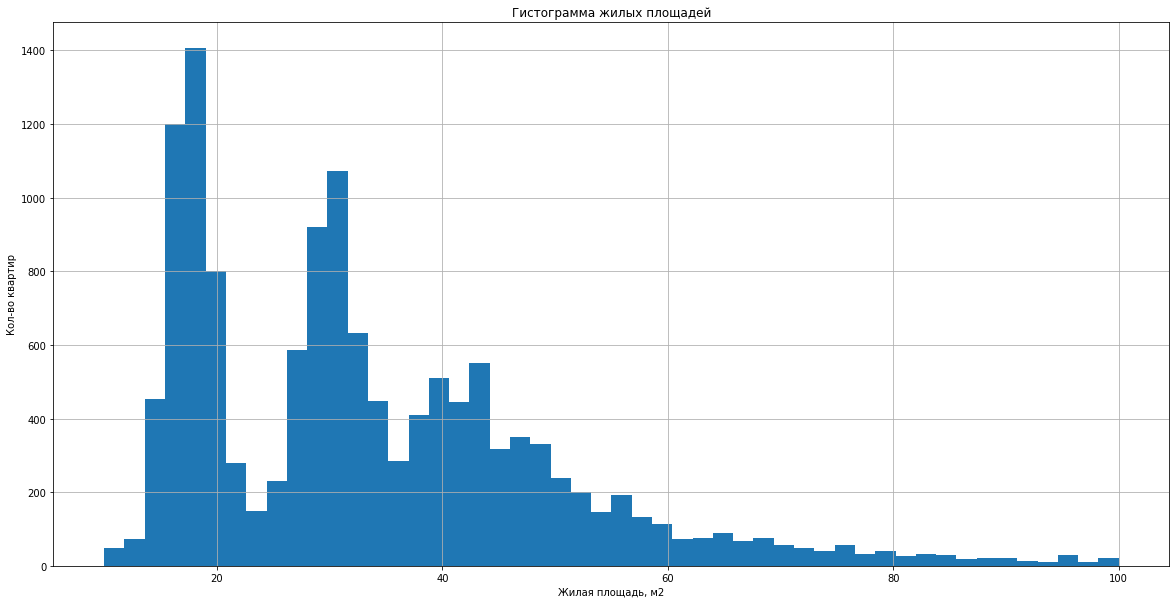

In [33]:
data['living_area'].hist(bins=50, range=(10, 100), figsize=(20,10))\
    .set(title = 'Гистограмма жилых площадей', xlabel = 'Жилая площадь, м2', ylabel = 'Кол-во квартир')

В основном жилая площадь квартир от 10 до 60 кв. метров. Имеются пики, которые предположительно соответствуют типовым площадям для одно-, двух-, трех- комнатных квартир.

**Построим гистограмму для площади кухни:**

[Text(0.5, 1.0, 'Гистограмма площадей кухнь'),
 Text(0.5, 0, 'Площадь кухнь, м2'),
 Text(0, 0.5, 'Кол-во квартир')]

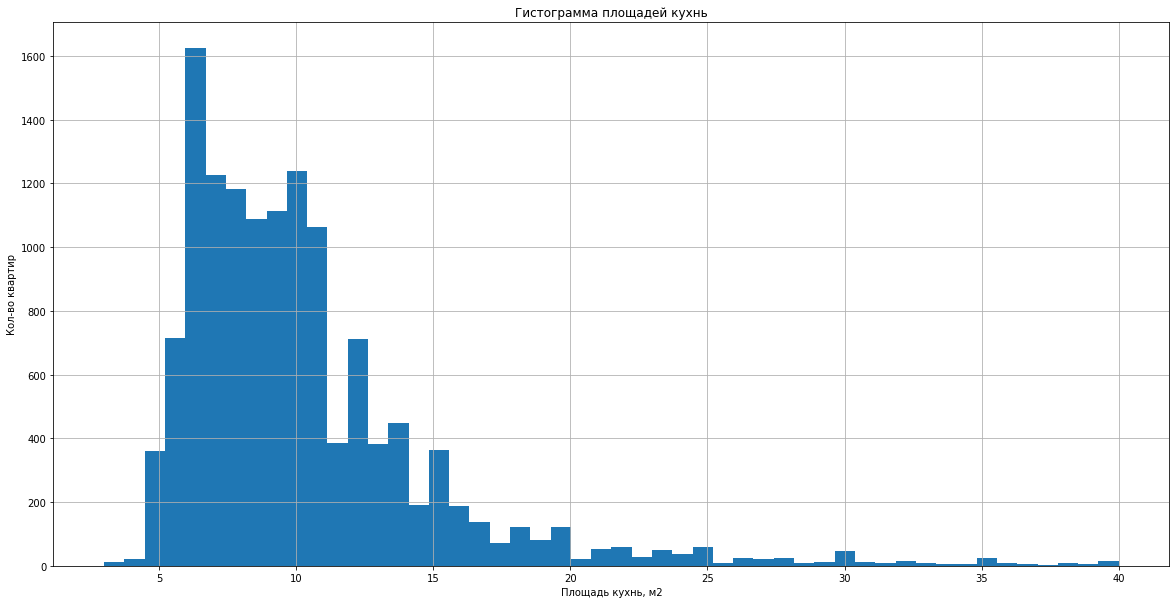

In [34]:
data['kitchen_area'].hist(bins=50, range=(3, 40), figsize=(20,10))\
    .set(title = 'Гистограмма площадей кухнь', xlabel = 'Площадь кухнь, м2', ylabel = 'Кол-во квартир')

В основном площадь кухонь от 4 до 20 кв. метров. Имеются пики, которые предположительно соответствуют типовым площадям для одно-, двух-, трех- комнатных квартир.

**Построим гистограмму для цены объекта:**

[Text(0.5, 1.0, 'Гистограмма цен объектов'),
 Text(0.5, 0, 'Цена, 10 млн руб.'),
 Text(0, 0.5, 'Кол-во квартир')]

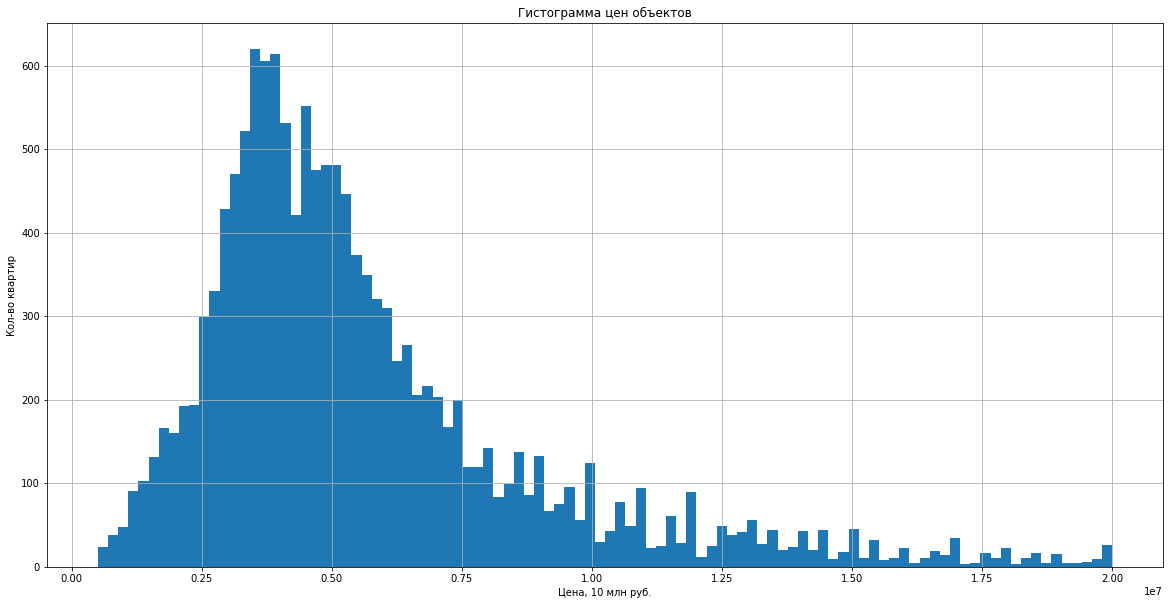

In [35]:
data['last_price'].hist(bins=100, range=(500000, 20000000), figsize=(20,10))\
    .set(title = 'Гистограмма цен объектов', xlabel = 'Цена, 10 млн руб.', ylabel = 'Кол-во квартир')


    
Цены распределены от 1 млн до 15 млн. На гистограмме наблюдаем пики, которые можно объяснить "скачковой" разницей в цене однокомнатных от двухкомнатных и трехкомнатных. Различие цен двухкомнатных и трехкомнатных незначительно, поэтому на гистограмме эти пики почти слились. 

**Построим гистограмму для количества комнат:**

[Text(0.5, 1.0, 'Гистограмма количества комнат'),
 Text(0.5, 0, 'Количество комнат'),
 Text(0, 0.5, 'Кол-во квартир')]

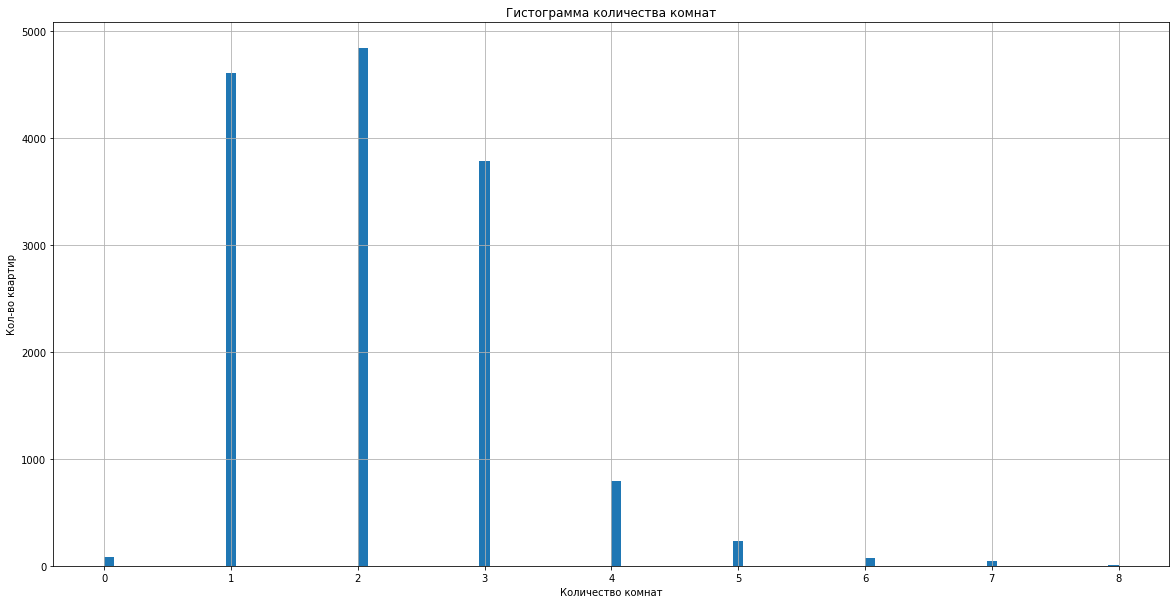

In [36]:
data['rooms'].hist(bins=100, range=(0, 8), figsize=(20,10))\
    .set(title = 'Гистограмма количества комнат', xlabel = 'Количество комнат', ylabel = 'Кол-во квартир')

Лучше всего на рынке представлены одно-, вдух- и трехкомнатные квартиры. Реже - четырехкомнатные и пяти.

**Построим гистограмму для высоты потолков:**

[Text(0.5, 1.0, 'Гистограмма высоты потолков'),
 Text(0.5, 0, 'Высота потолков'),
 Text(0, 0.5, 'Кол-во квартир')]

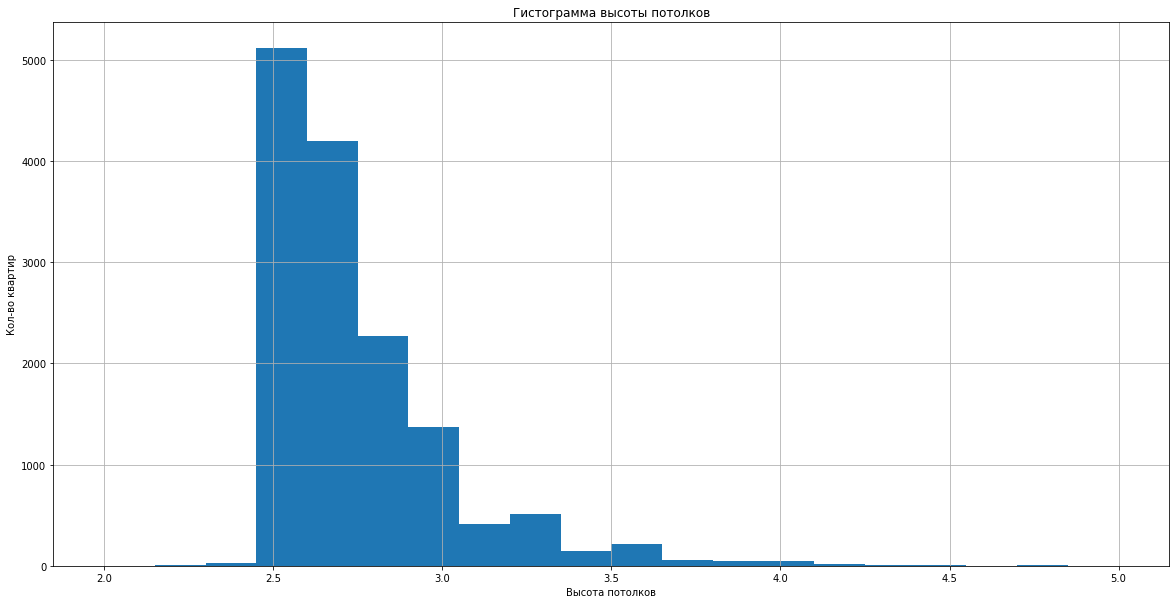

In [37]:
data['ceiling_height'].hist(bins=20, range=(2, 5), figsize=(20,10))\
    .set(title = 'Гистограмма высоты потолков', xlabel = 'Высота потолков', ylabel = 'Кол-во квартир')

Больше всего на рынке представлены квартиры с высотой потолков 2.5 м, с увеличением высоты потолков характерно уменьшается количество предложений. 

**Построим гистограмму для этажей квартиры:**

[Text(0.5, 1.0, 'Гистограмма этажей'),
 Text(0.5, 0, 'Этаж'),
 Text(0, 0.5, 'Кол-во квартир')]

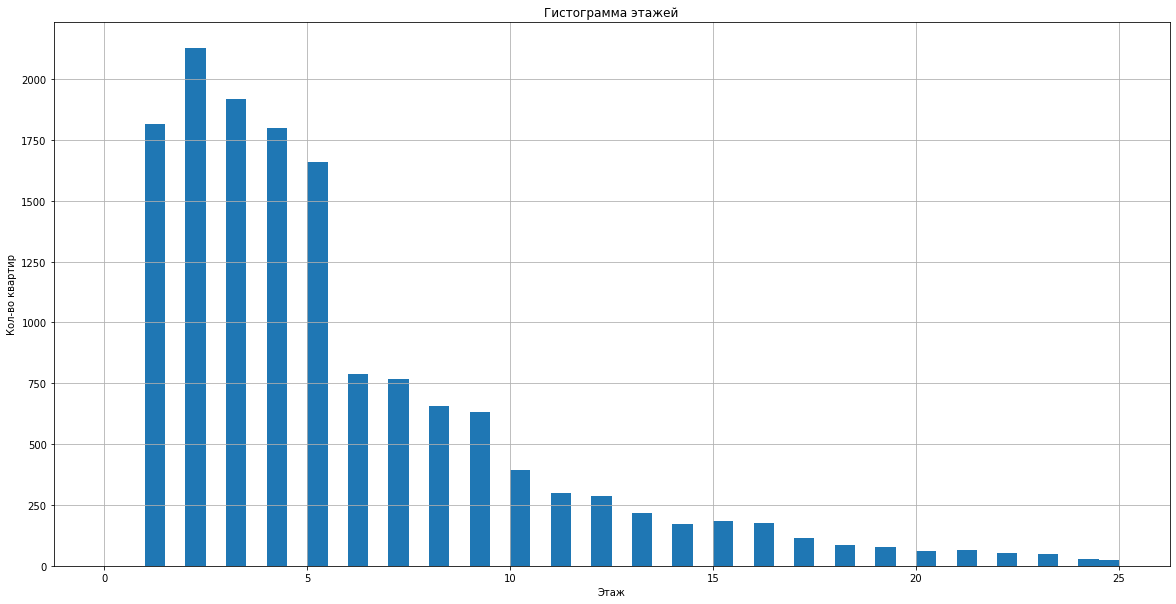

In [38]:
data['floor'].hist(bins=50, range=(0, 25), figsize=(20,10))\
    .set(title = 'Гистограмма этажей', xlabel = 'Этаж', ylabel = 'Кол-во квартир')

Больше всего предложений с первого по пятный этаж, далее заметно резкое падение предложения (сказывается большое количество пятиэтажной типовой застройки). Далее наблюдаем постепенное, характерное падение предложений с увеличением этажей. 

**Построим гистограмму для типов этажей квартиры («первый», «последний», «другой»):**

[Text(0.5, 1.0, 'Гистограмма типа этажей'),
 Text(0.5, 0, 'Этаж'),
 Text(0, 0.5, 'Кол-во квартир')]

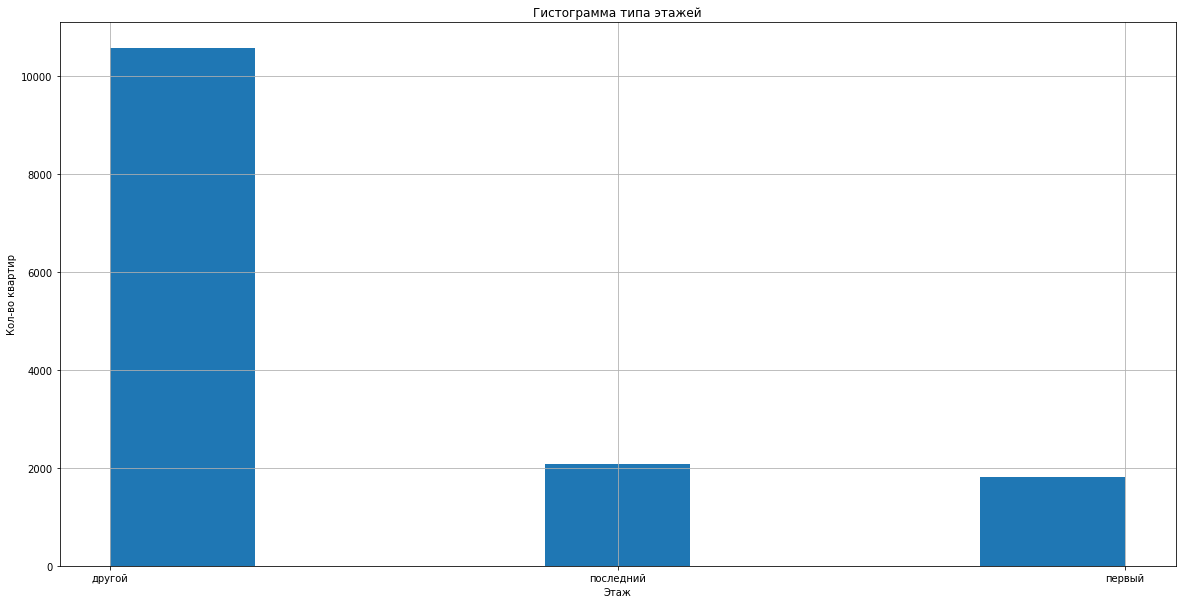

In [39]:
data['floor_type'].hist(bins=7, range=(0, 2), figsize=(20,10))\
    .set(title = 'Гистограмма типа этажей', xlabel = 'Этаж', ylabel = 'Кол-во квартир')

Имеем примерное равное количество предложений в первой и последнем этаже. Ожидаемо больше всего предложений на средних этажах. 

**Построим гистограмму для общего количества этажей в доме:**

[Text(0.5, 1.0, 'Гистограмма количества этажей'),
 Text(0.5, 0, 'Этаж'),
 Text(0, 0.5, 'Кол-во квартир')]

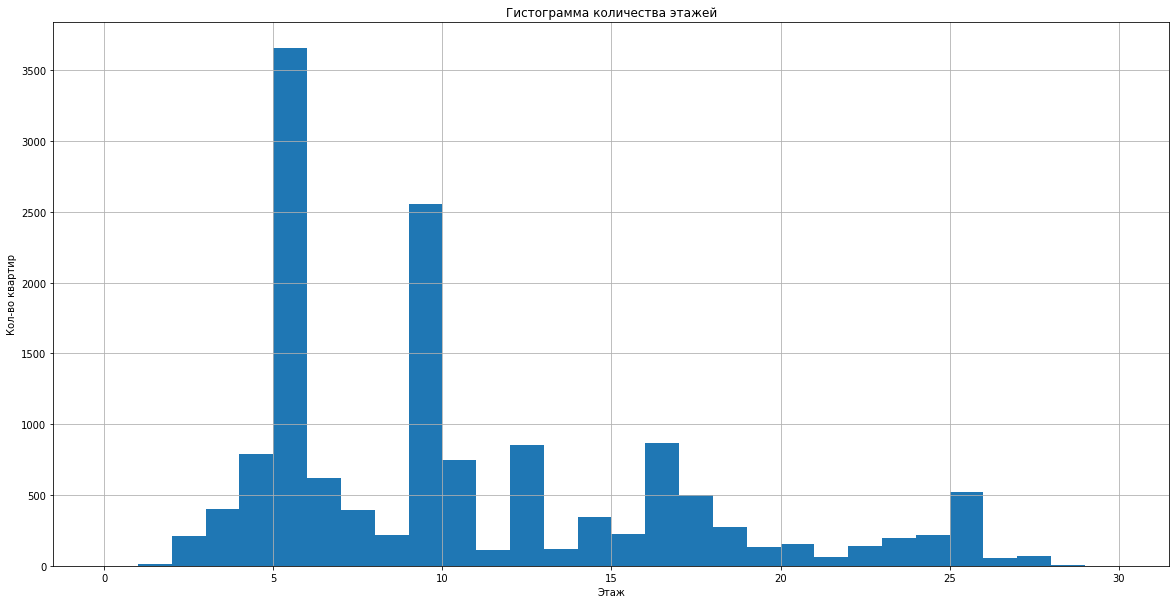

In [40]:
data['floors_total'].hist(bins=30, range=(0, 30), figsize=(20,10))\
    .set(title = 'Гистограмма количества этажей', xlabel = 'Этаж', ylabel = 'Кол-во квартир')

Данная гистограмма подтверждает большое количество предложений в типовой застройке. Больше всего в пятиэтажной застройке, поменьше - в дявитиэтажной. И наблюдаем редкие предложения в нетиповой застройке.

**Построим гистограмму для расстояния до центра города в метрах:**

[Text(0.5, 1.0, 'Гистограмма расстояний до центра'),
 Text(0.5, 0, 'км'),
 Text(0, 0.5, 'Кол-во квартир')]

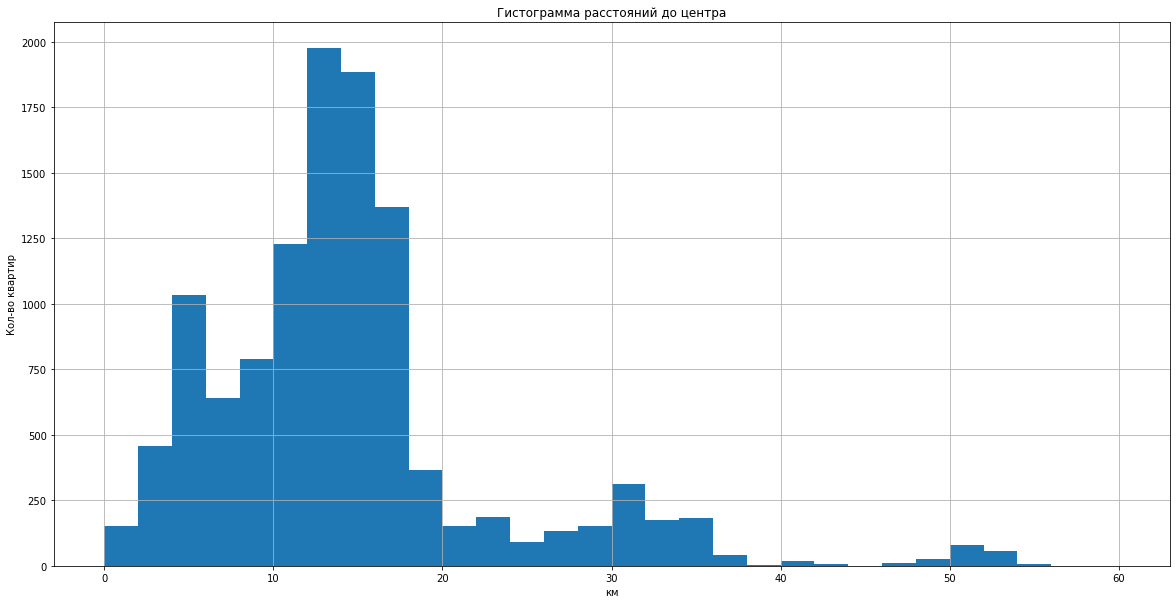

In [41]:
data['cityCenters_km'].hist(bins=30, range=(0, 60), figsize=(20,10))\
    .set(title = 'Гистограмма расстояний до центра', xlabel = 'км', ylabel = 'Кол-во квартир')


    
Проверим всплески на 30 и 50 километрах:

In [42]:
data[(data['cityCenters_km']>30)&(data['cityCenters_km']<35)]['locality_name'].value_counts()

Колпино         173
Петергоф         92
Пушкин           61
Сестрорецк       53
Шушары           40
Красное Село     26
Павловск         16
Понтонный        12
Name: locality_name, dtype: int64

In [43]:
data[(data['cityCenters_km']>50)&(data['cityCenters_km']<55)]['locality_name'].value_counts()

Ломоносов      66
Кронштадт      21
Зеленогорск    14
Name: locality_name, dtype: int64

Больше всего предложений в районах от 5 до 19 километров. Имеются всплески на 30 и 50 километров, на таком расстоянии расположены крупные города региона.

**Построим гистограмму для расстояния до ближайшего аэропорта:**

[Text(0.5, 1.0, 'Гистограмма расстояний до аэропорта'),
 Text(0.5, 0, 'км'),
 Text(0, 0.5, 'Кол-во квартир')]

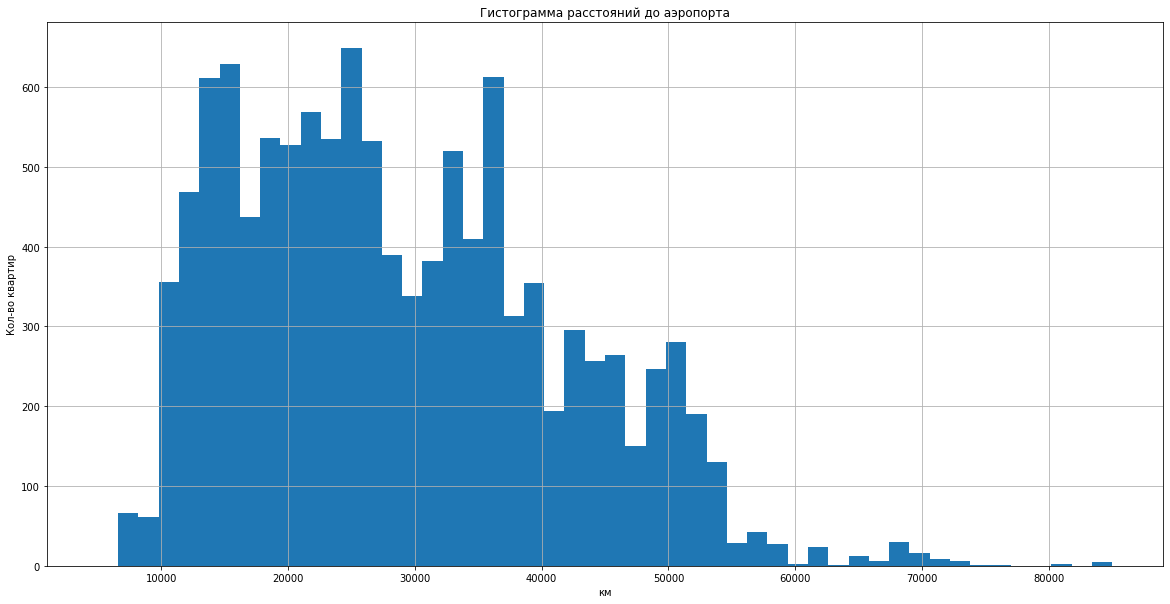

In [44]:
data['airports_nearest'].hist(bins=50, range=(5000, 85000), figsize=(20,10))\
    .set(title = 'Гистограмма расстояний до аэропорта', xlabel = 'км', ylabel = 'Кол-во квартир')

Наибольшее количество предложений от 10 до 55 км. Это распределение характерно, так как аэропорт расположен в удалении от города. Кроме того, наблюдаем пики, которые показывают распределение предложений по районам.

**Построим гистограмму для расстояния до ближайшего парка:**

[Text(0.5, 1.0, 'Гистограмма расстояний до парка'),
 Text(0.5, 0, 'км'),
 Text(0, 0.5, 'Кол-во квартир')]

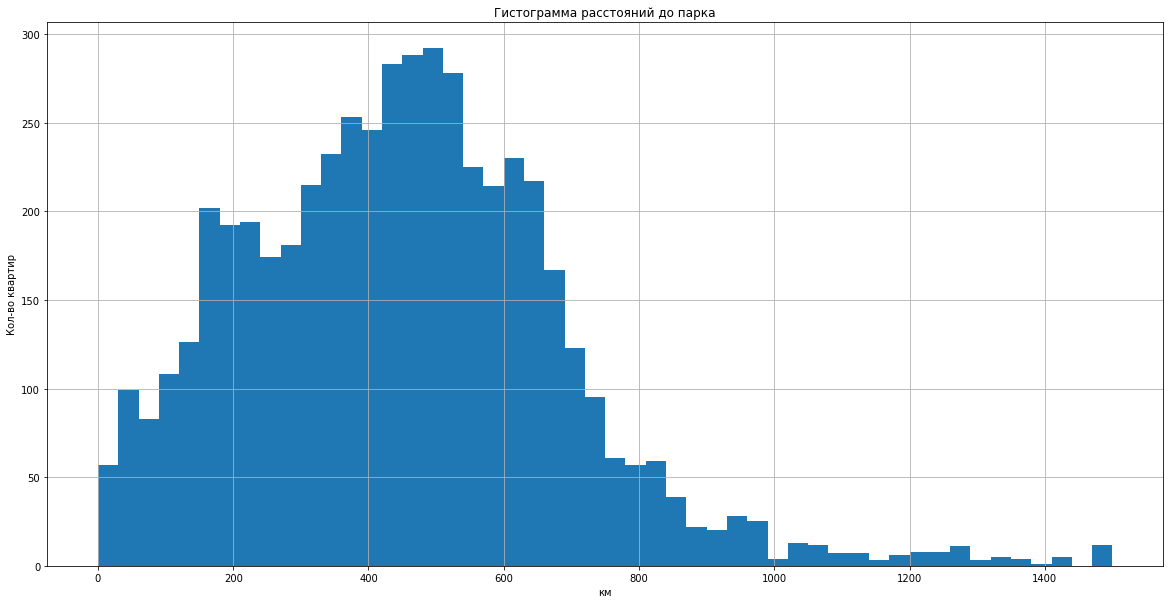

In [45]:
data['parks_nearest'].hist(bins=50, range=(0, 1500), figsize=(20,10))\
    .set(title = 'Гистограмма расстояний до парка', xlabel = 'км', ylabel = 'Кол-во квартир')



Процент пропусков в колонке parks_nearest:

In [46]:
data['parks_nearest'].isna().mean()

0.634893205225686


    
У большинства предложений, где указаны данные в колонке parks_nearest парки находятся в непосредственной близости (до 800 метров), таких объявлений 37%. Предложений, где не указали расстояние до парка 63%. Это говорит о том, что наличие парка является преимуществом и при публикации объявления эту графу заполняют, если парка поблизости нет - эту графу не заполняют. 

**Построим гистограмму для дня публикации объявления:**

[Text(0.5, 1.0, 'Гистограмма дней недели'),
 Text(0.5, 0, 'День недели'),
 Text(0, 0.5, 'Кол-во квартир')]

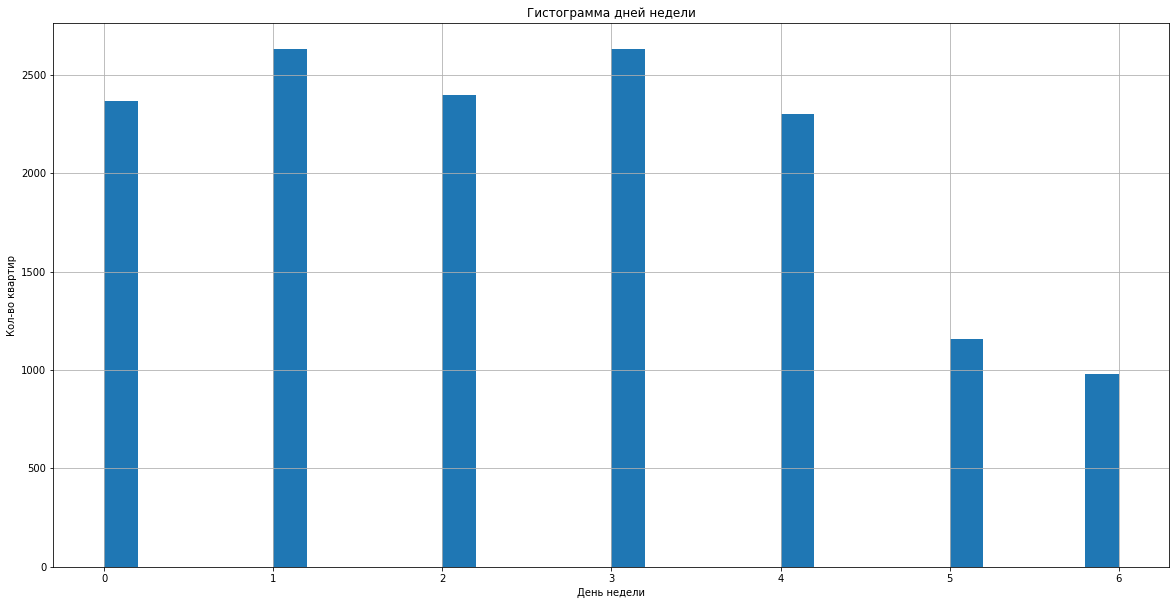

In [47]:
data['dayofweek_exposition'].hist(bins=30, range=(0, 6), figsize=(20,10))\
    .set(title = 'Гистограмма дней недели', xlabel = 'День недели', ylabel = 'Кол-во квартир')

В основном обявления размещают в будние дни, в субботу и воскресенье заметен спад.

**Построим гистограмму для месяца публикации объявления:**

[Text(0.5, 1.0, 'Гистограмма мецецов публикации'),
 Text(0.5, 0, 'Месяц'),
 Text(0, 0.5, 'Кол-во квартир')]

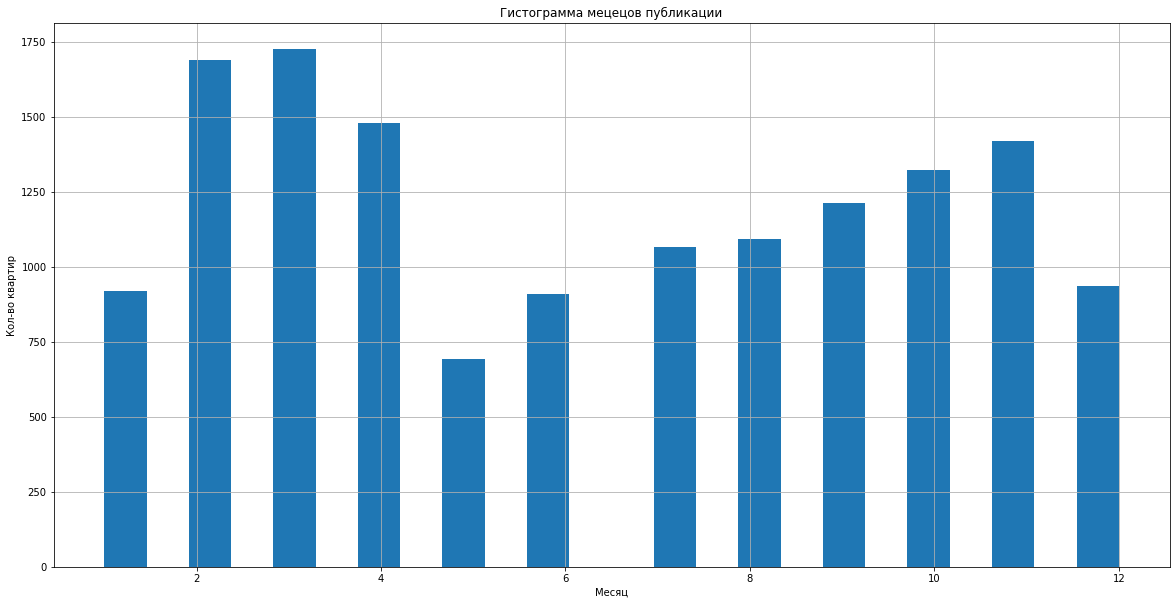

In [48]:
data['month_exposition'].hist(bins=24, range=(1, 12), figsize=(20,10))\
    .set(title = 'Гистограмма мецецов публикации', xlabel = 'Месяц', ylabel = 'Кол-во квартир')

Высоким сезоном можно считать февраль, март, апрель. Затем идет резкий спад и постепенный рост до декабря. Рождественский период (декабрь, январь) можно считать низким сезоном.

**Изучим, как быстро продавались квартиры:**

Построим гистограмму:

[Text(0.5, 1.0, 'Гистограмма дней экспозиции'),
 Text(0.5, 0, 'Дни'),
 Text(0, 0.5, 'Кол-во квартир')]

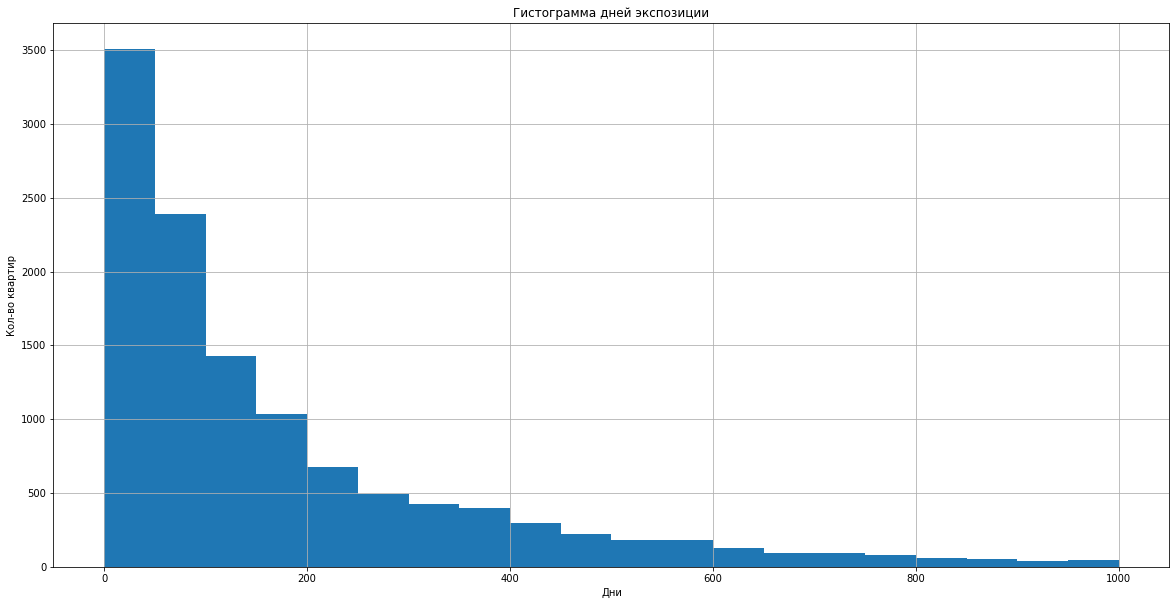

In [49]:
data['days_exposition'].hist(bins=20, range=(0, 1000), figsize=(20,10))\
    .set(title = 'Гистограмма дней экспозиции', xlabel = 'Дни', ylabel = 'Кол-во квартир')

Посмотрим числовой описание колонки days_exposition и построим диаграмму размаха:

In [50]:
data['days_exposition'].describe()

count    12020.000000
mean       190.320466
std        228.575626
min          1.000000
25%         45.000000
50%        103.000000
75%        247.000000
max       1580.000000
Name: days_exposition, dtype: float64

(0.0, 600.0)

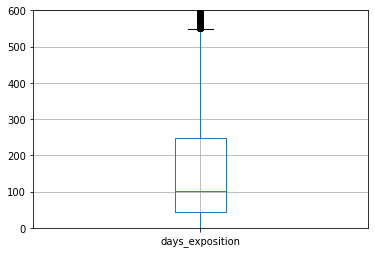

In [51]:
data.boxplot(column='days_exposition')
plt.ylim(0, 600)

Медианное значение количества дней объявления на сайте - 103 дня, среднее значение - 191 день. Стандартное отклонение - 229 дней. Минимальное значение - 1 день. Максимальное - 1580 дней.

Выбросами можно считать объявления, которые "провисели" на сайте больше 550 дней.

Таким образом продажа квартиры обычно занимает 103 дня. 25% квартир продаются от 0 до 45 дней, будем считать эти продажи быстрыми. 75% квартир продаются до 248 дней. Объявления которые "висят" от 248 до 550 дней, будем считать медленными продажами.

**Изучим, зависит ли цена от общей площади:**

<AxesSubplot:xlabel='total_area', ylabel='last_price'>

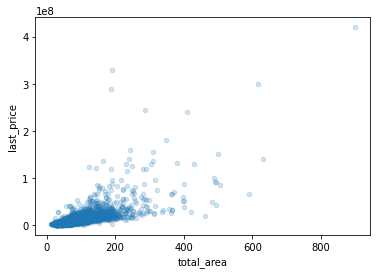

In [52]:
data.plot(x='total_area', y='last_price', kind='scatter', alpha=0.2)

In [53]:
data['total_area'].corr(data['last_price'])

0.7128344996480354

Имеем корреляцию общей площади и цены объекта: чем больше общая площадь, тем больше цена.

**Изучим, зависит ли цена от жилой площади:**

<AxesSubplot:xlabel='living_area', ylabel='last_price'>

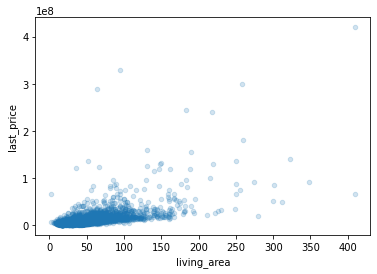

In [54]:
data.plot(x='living_area', y='last_price', kind='scatter', alpha=0.2)

In [55]:
data['living_area'].corr(data['last_price'])

0.6153240546892089

Имеем корреляцию жилой площади и цены объекта: чем больше жилая площадь, тем больше цена.

**Изучим, зависит ли цена от площади кухни:**

<AxesSubplot:xlabel='kitchen_area', ylabel='last_price'>

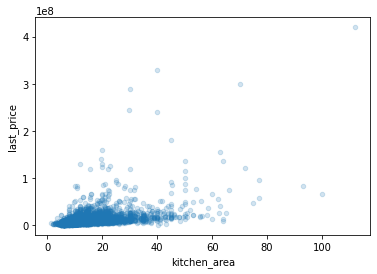

In [56]:
data.plot(x='kitchen_area', y='last_price', kind='scatter', alpha=0.2)

In [57]:
data['kitchen_area'].corr(data['last_price'])

0.5360760733268474

Имеем корреляцию площади кухни и цены объекта: чем больше площадь кухни, тем больше цена объекта. 
Однако корреляция уже не такая явная. Увеличение площади кухни увеличивает цену объекта не так сильно.

**Изучим, зависит ли цена от количества комнат:**

<AxesSubplot:xlabel='rooms', ylabel='last_price'>

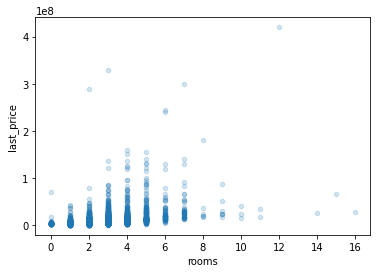

In [58]:
data.plot(x='rooms', y='last_price', kind='scatter', alpha=0.2)

In [59]:
data['rooms'].corr(data['last_price'])

0.4013492806667695

Имеем корреляцию количества комнат и цены объекта: чем больше количества комнат, тем больше цена объекта. 
Кроме того, наблюдаем, что корреляция проявляется сильнее до пяти комнат, дальнейшее увеличение комнат не влияет на цену. 
Предположительно объекты с количеством комнат восемь и более являются загородными, на цену которых влияет удаление от города.

**Изучим, зависит ли цена от этажа, на котором расположена квартира (первый, последний, другой):**

In [60]:
data.pivot_table(index='floor_type', values='last_price', aggfunc='median').sort_values(by='last_price')

,last_price
floor_type,
первый,4060000.0
последний,4500000.0
другой,5000000.0


<AxesSubplot:xlabel='floor_type', ylabel='last_price'>

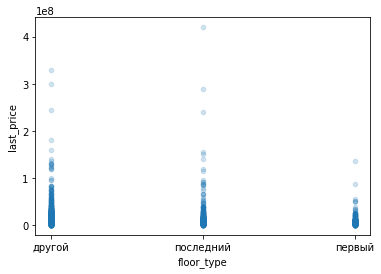

In [61]:
data.plot(x='floor_type', y='last_price', kind='scatter', alpha=0.2)

Имеем небольшую корреляцию: цены на средние этажи выше всех, дешевле в последних этажах и самые дешевые на первых.

**Изучим, зависит ли цена от деня недели:**

In [62]:
day_price = data.pivot_table(index='dayofweek_exposition', values='last_price', aggfunc='median').reset_index()
day_price

,dayofweek_exposition,last_price
0,0,4900000.0
1,1,5000000.0
2,2,4859000.0
3,3,4887500.0
4,4,4750000.0
5,5,4695000.0
6,6,4700000.0


<AxesSubplot:xlabel='dayofweek_exposition'>

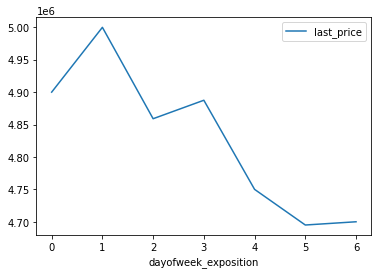

In [63]:
day_price.plot(x='dayofweek_exposition', y='last_price')

Наблюдаем, что объявления выставленные в пятницу, субботу и в воскресенье имеют ниже сцену, чем объявления выставленные посреди недели.

**Изучим, зависит ли цена от месяца:**

In [64]:
month_price = data.pivot_table(index='month_exposition', values='last_price', aggfunc='median').reset_index()
month_price

,month_exposition,last_price
0,1,4900000.0
1,2,4900000.0
2,3,4700000.0
3,4,5000000.0
4,5,4800000.0
5,6,4600000.0
6,7,4950000.0
7,8,4900000.0
8,9,4855000.0
9,10,4763000.0


(4000000.0, 6000000.0)

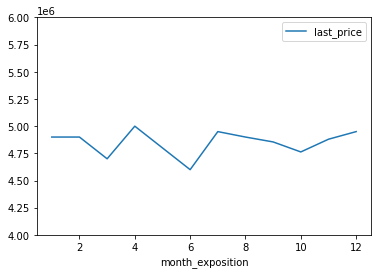

In [65]:
month_price.plot(x='month_exposition', y='last_price')
plt.ylim(4000000, 6000000)

Какой либо очевидной корреляции между месяцем и ценой не наблюдаем.

**Изучим, зависит ли цена от года:**

In [66]:
year_price = data.pivot_table(index='year_exposition', values='last_price', aggfunc='median').reset_index()
year_price

,year_exposition,last_price
0,2014,7700000.0
1,2015,5600000.0
2,2016,4850000.0
3,2017,4700000.0
4,2018,4700000.0
5,2019,5200000.0


<AxesSubplot:xlabel='year_exposition'>

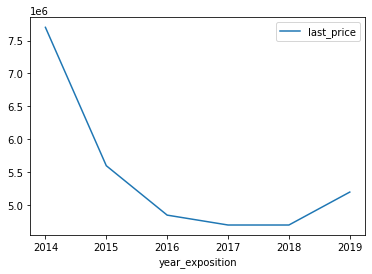

In [67]:
year_price.plot(x='year_exposition', y='last_price')

In [68]:
year_price['year_exposition'].corr(year_price['last_price'])

-0.7124171612304219

Отмечаем отрицательную корреляцию. Однако на графике видим, что цена снижалась от 2014 года до 2018 года. 
В 2019 году наблюдаем рост медианной цены посравнению с 2018 годом.

**Посчитаем среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений:**

In [69]:
data_price = data.pivot_table(index='locality_name', values='price_area', aggfunc=['count', 'mean']).reset_index() 
# составили сводную таблицу
data_price.columns = ['locality_name', 'count', 'mean_price'] 
# переименовали колонки в сводной таблице
data_price10 = data_price.sort_values(by='count', ascending=False).head(10) 
# отсортировали по количеству объявлений, оставили первые 10
data_price10 = data_price10.sort_values(by='mean_price', ascending=False).reset_index().loc[:, ['locality_name', 'mean_price']] 
# отсортировали по средней цене, сбросили индексы, оставили только названия и медианную цену за кв. метр
data_price10

,locality_name,mean_price
0,Санкт-Петербург,115709.483948
1,Пушкин,103920.474359
2,Кудрово,96105.432990
3,Парголово,90901.321168
4,Мурино,87816.903509
5,Петергоф,85554.131034
6,Шушары,79286.476852
7,Колпино,75938.527094
8,Гатчина,69992.644295
9,Всеволожск,67434.612546


На основании полученной таблицы видим, что самая большая стоимость за квадратный метр в г. Санк-Петербург, самая дешевая - г. Всеволожск.

**Вычислим среднюю цену каждого километра до центра в г. Санкт-Петербург:**

In [70]:
data_SP = data[data['locality_name'] == 'Санкт-Петербург'].pivot_table(
    index='cityCenters_km', values='last_price', aggfunc='mean'
).reset_index()
data_SP

,cityCenters_km,last_price
0,0.0,2.282661e+07
1,1.0,2.197475e+07
2,2.0,1.751369e+07
3,3.0,1.123424e+07
4,4.0,1.281705e+07
5,5.0,1.453073e+07
6,6.0,1.596060e+07
7,7.0,1.494863e+07
8,8.0,1.070387e+07
9,9.0,7.406132e+06


In [71]:
data_SP['cityCenters_km'].corr(data_SP['last_price'])

-0.7181735400925782

<AxesSubplot:xlabel='cityCenters_km'>

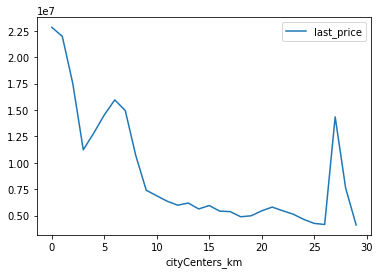

In [72]:
data_SP.plot(x='cityCenters_km', y='last_price')

Наблюдаем отрицательную корреляцию между ценой и удалением от центра: чем дальше от центра, тем дешевле недвижимость.
На графике видим всплески, которые можно связать с элитными районами, находящимися в отдалении от центра.

### Общий вывод


    
Выполнив проект мы выяснили, что наибольшее предложение объектов с общей площадью от 25 до 120 кв. метров, жилой площадью от 10 до 60 кв. метров. площадью кухонь от 4 до 20  кв. метров, с количеством комнат от одной до трех, с высотой потолков от 2,5 метров до 3, в пятиэтажках на среднем этаже, ценой от миллиона до пятнадцати, с расстоянием от центра от 5 до 19 км и расстоянием до аэропорта от 10 до 55 км, у 37% объектов в непосредственной близости (до 800 м) имеется парк. Больше всего размещают объявления в будние дни и в феврале, марте апреле. Половина объектов находились на продаже до 103 дней.

Цена прямо зависит от площади полной, жилой и площади кухни, от количества комнат (если их количество до пяти). На средних этажах самые дорогие объекты. Дешевле всего объекты, которые публиковались в выходные дни. С 2014 год по 2018 год недвижимость дешевела, далее заметен рост. Кроме того, чем дальше объект от центра, тем дешевле недвижимость (несчитая элитных районов).